In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Banknote_authentication.csv')

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


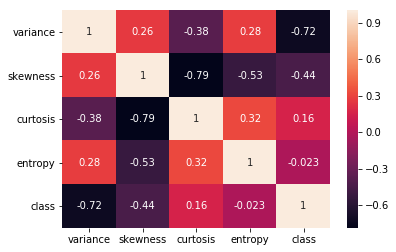

In [4]:
sns.heatmap(data.corr(),annot=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


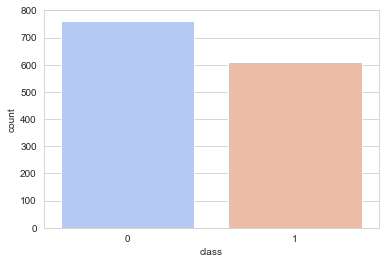

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=data,palette='coolwarm')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('class',axis=1), 
                                                    data['class'], test_size=0.20, random_state=0)

In [9]:
from sklearn.svm import SVC

In [10]:
model = SVC()

In [11]:
model.fit(X_train,y_train)

C:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
model.score(X_train,y_train)

1.0

In [25]:
model.score(X_train,y_train)

1.0

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))

[[157   0]
 [  0 118]]


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# Using Grid search to find best values of C and gamma Hyperparameters

In [30]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [33]:
grid.fit(X_train,y_train)

C:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6939890710382514, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6775956284153005, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6767123287671233, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9972677595628415, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9808743169398907, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9972602739726028, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[CV] ........... C=1000, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........... C=1000, gamma=1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9972677595628415, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ......... C=1000, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ......... C=1000, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ........ C=1000, gamma=0.01, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ........ C=1000, gamma=0.01, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [34]:
grid.best_params_          # by default we took right vale of C and Gamma 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [35]:
grid_predictions = grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test,grid_predictions))    

[[157   0]
 [  0 118]]


In [37]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

